In [152]:
import numpy as np
import pandas as pd
import os
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import optimizers
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle           
import matplotlib.pyplot as plt             
import tensorflow as tf                
from tqdm import tqdm
import cv2
from tensorflow.keras import regularizers

In [153]:
def get_images(img_path):
    label = _
    Images = []
    Labels = []
    
    for labels in os.listdir(img_path):
        #ordinal encoding categorical labels
        if labels == 'buildings': 
            label = 0
        elif labels == 'forest':
            label = 1
        elif labels == 'glacier':
            label = 2
        elif labels == 'mountain':
            label = 3
        elif labels == 'sea':
            label = 4
        elif labels == 'street':
            label = 5
        
        for image_file in os.listdir(img_path+labels):
            image = cv2.imread(img_path+labels+r'/'+image_file)
            image = cv2.resize(image, (150,150))
            Images.append(image)
            Labels.append(label)
    
    return shuffle(Images, Labels, random_state=72)

In [155]:
train_images, train_labels = get_images('seg_train/')

In [156]:
test_images, test_labels = get_images('seg_test/')

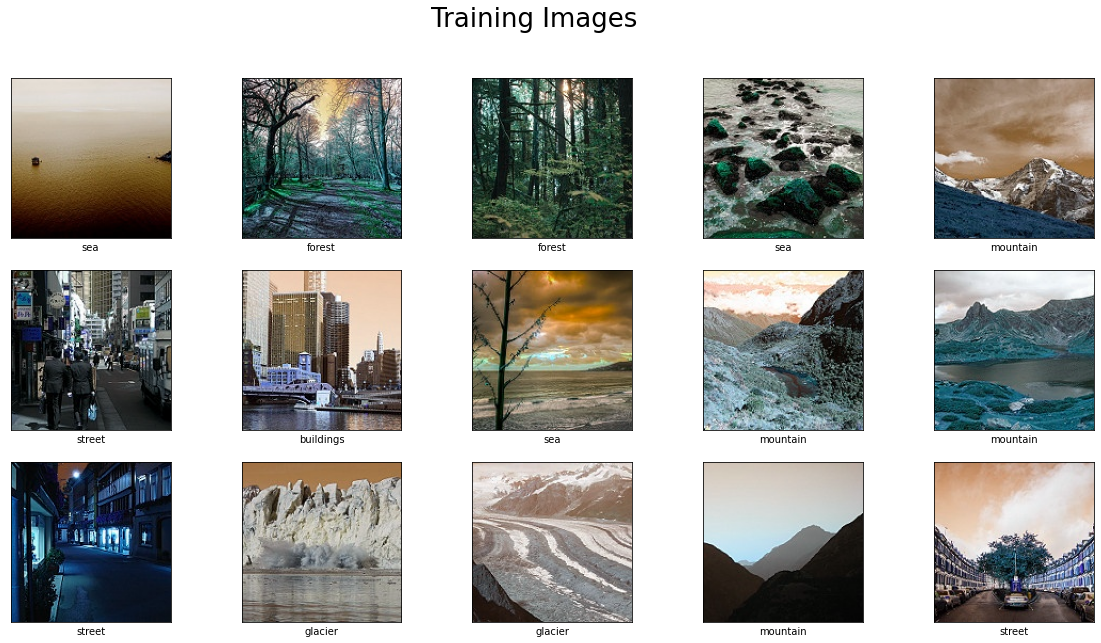

In [157]:
# visualize some examples of the training data
classes = ['buildings','forest','glacier','mountain','sea','street']   

fig = plt.figure(figsize=(20,10))
fig.suptitle('Training Images', fontsize=26)
for i in range(15):
    plt.subplot(3,5,i+1)
    plt.xticks([])
    plt.yticks([])
    # Started at 20 to show more mountain and glacier images
    plt.imshow(train_images[20+i], cmap=plt.cm.binary)
    plt.xlabel(classes[train_labels[20+i]])
plt.show()

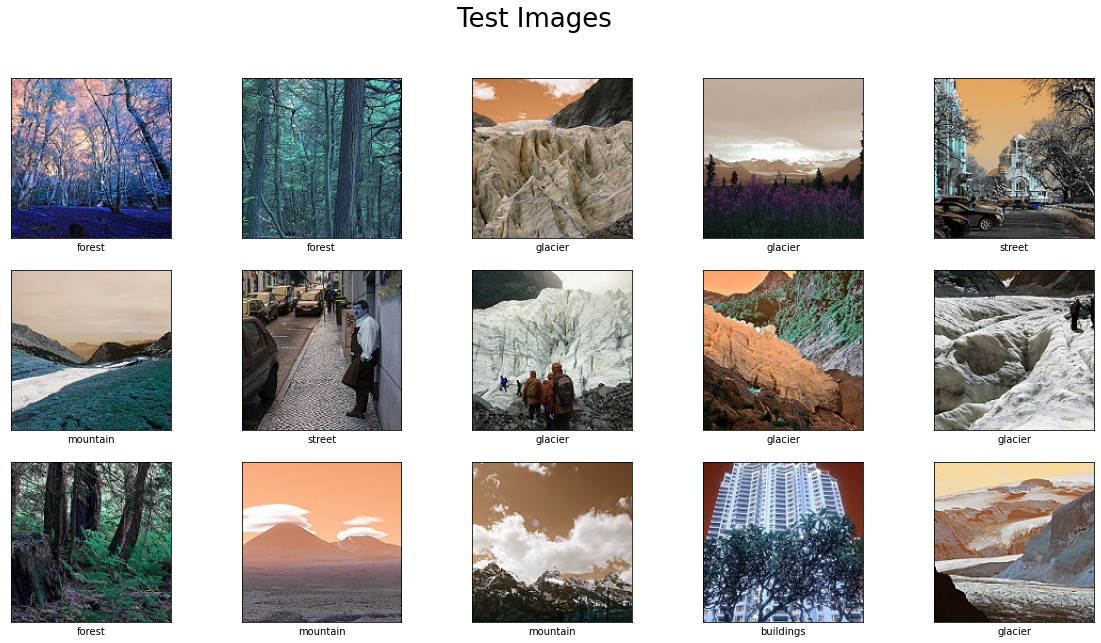

In [158]:
fig = plt.figure(figsize=(20,10))
fig.suptitle('Test Images', fontsize=26)
for i in range(15):
    plt.subplot(3,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(test_images[20+i], cmap=plt.cm.binary)
    plt.xlabel(classes[test_labels[20+i]])
plt.show()

In [161]:
x_train = np.array(train_images)
y_train = np.array(train_labels)

In [137]:
x_test = np.array(test_images)
y_test = np.array(test_labels)

In [36]:
model = Sequential()
model.add(Conv2D(16,(3, 3), input_shape=(150, 150, 3), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((5,5)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(MaxPooling2D((5,5)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(6, activation='softmax'))

In [37]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 146, 146, 32)      4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 29, 29, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 27, 27, 32)        9248      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 25, 25, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 5, 64)         

In [38]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

In [39]:
train_model = model.fit(x_train, y_train, epochs=30,
                           validation_data=(x_test, y_test))

Epoch 1/30
439/439 [==============================] - 169s 385ms/step - loss: 1.6856 - accuracy: 0.4508 - val_loss: 0.9401 - val_accuracy: 0.7013
Epoch 2/30
439/439 [==============================] - 174s 397ms/step - loss: 0.9104 - accuracy: 0.7011 - val_loss: 0.7738 - val_accuracy: 0.7423
Epoch 3/30
439/439 [==============================] - 171s 390ms/step - loss: 0.7038 - accuracy: 0.7745 - val_loss: 0.8630 - val_accuracy: 0.7123
Epoch 4/30
439/439 [==============================] - 172s 391ms/step - loss: 0.6199 - accuracy: 0.7996 - val_loss: 0.5131 - val_accuracy: 0.8423
Epoch 5/30
439/439 [==============================] - 170s 387ms/step - loss: 0.5655 - accuracy: 0.8185 - val_loss: 0.5731 - val_accuracy: 0.8097
Epoch 6/30
439/439 [==============================] - 174s 397ms/step - loss: 0.6105 - accuracy: 0.7974 - val_loss: 0.5977 - val_accuracy: 0.7957
Epoch 7/30
439/439 [==============================] - 173s 395ms/step - loss: 0.5214 - accuracy: 0.8313 - val_loss: 0.5032 -

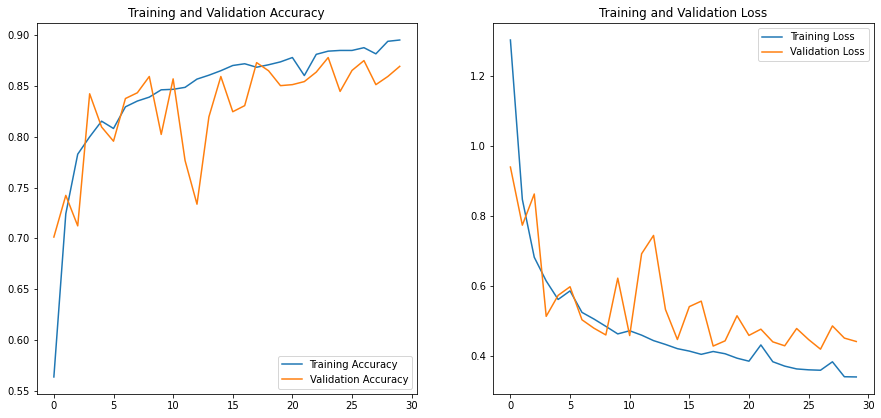

In [162]:
acc = train_model.history['accuracy']
val_acc = train_model.history['val_accuracy']
loss = train_model.history['loss']
val_loss = train_model.history['val_loss']

epochs_range = range(30)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [41]:
predictions = model.predict(x_test)
pred_labels = np.argmax(predictions, axis = 1)

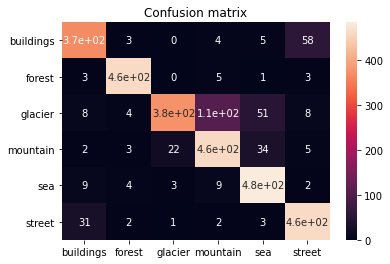

In [42]:
import seaborn as sns
CM = confusion_matrix(y_test, pred_labels)
ax = plt.axes()
sns.heatmap(CM, annot=True, 
           annot_kws={"size": 10}, 
           xticklabels=classes, 
           yticklabels=classes, ax = ax)
ax.set_title('Confusion matrix')
plt.show()

In [43]:
from tensorflow.keras.preprocessing import image

In [165]:
forest_img = image.load_img('Forest.jpeg', target_size=(150, 150))
input_arr = image.img_to_array(forest_img)
input_arr = np.array([input_arr])
forest_pred = model.predict(input_arr)

In [166]:
sea_img = image.load_img('Sea.jpeg', target_size=(150, 150))
input_arr = image.img_to_array(sea_img)
input_arr = np.array([input_arr])
sea_pred = model.predict(input_arr)

In [167]:
streets_img = image.load_img('Streets.jpeg', target_size=(150, 150))
input_arr = image.img_to_array(streets_img)
input_arr = np.array([input_arr])
street_pred = model.predict(input_arr)

In [168]:
glacier_img = image.load_img('Glacier.jpeg', target_size=(150, 150))
input_arr = image.img_to_array(glacier_img)
input_arr = np.array([input_arr])
glacier_pred = model.predict(input_arr)

In [169]:
mount_img = image.load_img('Mountains.jpeg', target_size=(150, 150))
input_arr = image.img_to_array(mount_img)
input_arr = np.array([input_arr])
mountain_pred = model.predict(input_arr)

In [170]:
build_img = image.load_img('Buildings.jpeg', target_size=(150, 150))
input_arr = image.img_to_array(build_img)
input_arr = np.array([input_arr])
buildings_pred = model.predict(input_arr)

In [171]:
trick_img = image.load_img('Sea-Mountains.jpeg', target_size=(150, 150))
input_arr = image.img_to_array(trick_img)
input_arr = np.array([input_arr])
sea_mount_pred = model.predict(input_arr)

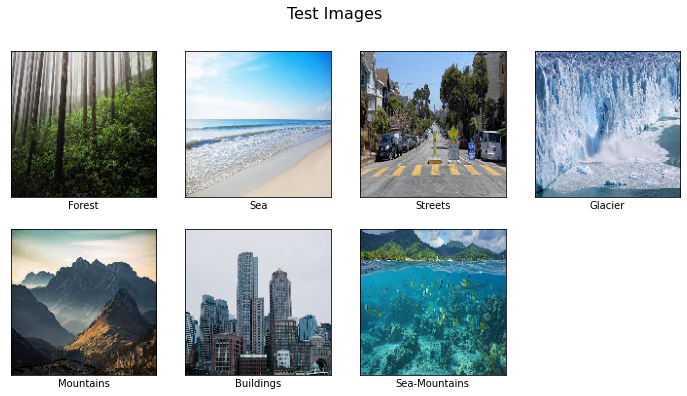

In [172]:
classes = ['Forest','Sea','Streets','Glacier','Mountains','Buildings','Sea-Mountains']
images = [forest_img, sea_img, streets_img, glacier_img, mount_img, build_img, trick_img]

fig = plt.figure(figsize=(12,6))
fig.suptitle('Test Images', fontsize=16)
for i in range(7):
    plt.subplot(2,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(images[i], cmap=plt.cm.binary)
    plt.xlabel(classes[i])
plt.show()

In [173]:
predictions = [forest_pred, sea_pred, street_pred, glacier_pred, 
               mountain_pred, buildings_pred, sea_mount_pred]

In [87]:
# Check how well the model predicts new data
df = pd.DataFrame(np.concatenate(predictions),columns=classes)
df['Image Type'] = ['Forest','Sea','Streets','Glacier','Mountains',
                   'Buildings','Sea-Mountains']

In [88]:
df=df.set_index('Image Type')
df.round(3)

,buildings,forest,glacier,mountain,sea,street
Image Type,,,,,,
Forest,0.005,0.988,0.001,0.001,0.000,0.004
Sea,0.000,0.000,0.010,0.034,0.955,0.000
Streets,0.004,0.000,0.000,0.000,0.000,0.996
Glacier,0.007,0.936,0.013,0.003,0.005,0.037
Mountains,0.299,0.000,0.018,0.463,0.204,0.015
Buildings,1.000,0.000,0.000,0.000,0.000,0.000
Sea-Mountains,0.010,0.664,0.160,0.074,0.091,0.001
